# Flood susceptibility

In [199]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# random seeding
r_seed = 11
np.random.seed(r_seed)
random.seed(r_seed)

# warning hiding
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

# plots type
%matplotlib inline

In [200]:
data_url = r'./data/Data.xlsx'
data_egypt = pd.read_excel(data_url, sheet_name='Egypt')
data_vietnam = pd.read_excel(data_url, sheet_name='Vietnam')
data_algeria = pd.read_excel(data_url, sheet_name='Algeria')

In [201]:
DATA = data_algeria

### Data Insights

In [202]:
DATA

,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
0,1,-1.000000,1006,0.000000,3,0.227686,7,1710.000000,0,180,0.000000,0.000000,0.000000
1,1,71.565048,1006,-0.024691,3,0.184885,1446,1064.558472,0,179,0.503279,0.003528,3.822717
2,1,225.000000,1004,-0.024691,4,0.288992,167,381.837646,0,180,0.112539,0.000091,3.162041
3,1,135.000000,1004,0.018519,5,0.168968,21,90.000000,0,178,0.450149,0.000046,-0.296421
4,1,278.130096,1006,0.000000,4,0.277231,1,397.279236,0,181,0.562680,0.000003,-3.530689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0,315.000000,896,-0.046296,42,0.073219,11,2098.233398,22,181,0.337615,0.000018,-0.654785
896,0,185.194427,949,0.000000,14,0.491044,2973,0.000000,0,178,0.878893,0.012669,3.985914
897,0,135.000000,902,0.024691,32,0.238735,0,3380.071533,20,178,0.450149,0.000000,-6.907755
898,0,161.565048,905,0.008642,33,0.054309,0,4330.142578,23,177,1.006481,0.000000,-6.907755


In [203]:
DATA.describe()

,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,9.000000e+02,900.000000
mean,0.500000,170.783180,996.888889,0.002882,72.252222,0.313609,909.700000,2967.307112,49.638889,180.468889,3.079560,2.508063e-03,-2.784857
std,0.500278,111.528519,34.000309,0.042784,119.932154,0.133220,9309.543056,2344.414798,94.798220,13.168208,4.551744,3.293920e-02,3.387777
min,0.000000,-1.000000,893.000000,-0.256609,-1.000000,-0.177473,0.000000,0.000000,0.000000,116.000000,0.000000,0.000000e+00,-6.907755
25%,0.000000,68.876324,983.000000,-0.012346,3.000000,0.221207,1.000000,1064.558441,0.000000,179.000000,0.318307,4.125000e-07,-6.071217
50%,0.500000,171.608047,1001.000000,0.000000,8.000000,0.331919,4.000000,2427.350342,2.000000,180.000000,0.573822,2.182000e-05,-2.745026
75%,1.000000,273.890114,1015.000000,0.016733,91.500000,0.404251,20.000000,4455.161499,54.000000,181.000000,4.737555,1.063925e-04,-0.146269
max,1.000000,359.028992,1075.000000,0.308078,639.000000,0.622533,137441.000000,11480.073242,600.000000,229.000000,22.158613,8.534528e-01,8.712674


### Data Normalization

In [204]:
from sklearn.preprocessing import MinMaxScaler
Nr = MinMaxScaler()

DATA_N = DATA.drop('Flood', axis=1)
DATA_N = Nr.fit_transform(DATA_N)
DATA_N = pd.DataFrame(DATA_N, columns=DATA.columns[1:])

DATA_N['Flood'] = DATA['Flood']
DATA_N.head()

,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI,Flood
0,0.000000,0.620879,0.454427,0.006250,0.506445,0.000051,0.148954,0.0,0.566372,0.000000,0.000000,0.442226,1
1,0.201553,0.620879,0.410701,0.006250,0.452943,0.010521,0.092731,0.0,0.557522,0.022713,0.004134,0.686951,1
2,0.627727,0.609890,0.410701,0.007812,0.583077,0.001215,0.033261,0.0,0.566372,0.005079,0.000107,0.644656,1
3,0.377747,0.609890,0.487221,0.009375,0.433048,0.000153,0.007840,0.0,0.548673,0.020315,0.000054,0.423249,1
4,0.775299,0.620879,0.454427,0.007812,0.568376,0.000007,0.034606,0.0,0.575221,0.025393,0.000003,0.216196,1


### Dimension Reduction with PCA

<AxesSubplot:>

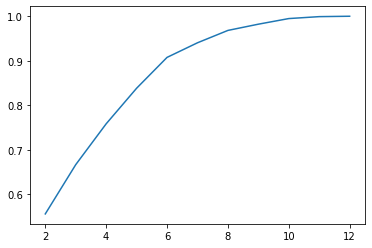

In [205]:
from sklearn.decomposition import PCA

DATA_PCA = DATA_N.drop('Flood', axis=1)

variance_ratio = {}
for n in range(2, DATA_PCA.shape[1]+1):
    pca = PCA(n_components=n)
    cr_pca = pca.fit(DATA_PCA)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)

pd.Series(variance_ratio).plot()

In [206]:
pca = PCA(n_components=7)
DATA_R = pca.fit_transform(DATA_PCA)
DATA_R = pd.DataFrame(
  DATA_R,
  columns=[f'PC-{i+1}' for i in range(DATA_R.shape[1])]
)
DATA_R['Flood'] = DATA['Flood']

print(f'{DATA_R.shape[0]}x{DATA_R.shape[1]}')
DATA_R.head()

900x8


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,Flood
0,-0.489852,0.231796,-0.021801,-0.102391,0.062819,0.096894,0.042328,1
1,-0.469355,0.003436,-0.072354,-0.255486,0.219397,0.045184,0.041880,1
2,-0.232465,-0.341223,-0.038024,-0.259495,0.108191,-0.062034,-0.023565,1
3,-0.291125,-0.081948,0.110997,-0.197377,0.055787,0.132233,-0.003582,1
4,0.019292,-0.345965,0.140633,-0.093670,-0.136417,0.085592,-0.039974,1


### Splitting Positive and Negative classes

In [207]:
[(_, DATA_NEG), (_, DATA_POS)] = DATA_R.groupby('Flood')

DATA_POS, DATA_NEG = pd.DataFrame(DATA_POS), pd.DataFrame(DATA_NEG)

DATA_NEG_X = DATA_NEG.drop('Flood', axis=1)
DATA_NEG_Y = DATA_NEG['Flood']

DATA_POS_X = DATA_POS.drop('Flood', axis=1)
DATA_POS_Y = DATA_POS['Flood']

DATA_POS

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,Flood
0,-0.489852,0.231796,-0.021801,-0.102391,0.062819,0.096894,0.042328,1
1,-0.469355,0.003436,-0.072354,-0.255486,0.219397,0.045184,0.041880,1
2,-0.232465,-0.341223,-0.038024,-0.259495,0.108191,-0.062034,-0.023565,1
3,-0.291125,-0.081948,0.110997,-0.197377,0.055787,0.132233,-0.003582,1
4,0.019292,-0.345965,0.140633,-0.093670,-0.136417,0.085592,-0.039974,1
...,...,...,...,...,...,...,...,...
445,-0.434469,0.117031,-0.083022,-0.099060,0.102813,0.046206,0.034429,1
446,-0.173807,-0.301800,0.017053,-0.222406,0.069678,0.086714,-0.026661,1
447,-0.464341,0.096249,-0.059289,-0.189488,0.115271,0.064806,0.040361,1
448,-0.159351,0.229494,-0.069206,0.220743,-0.338969,-0.015882,-0.008957,1


### Decomposition of Positive Class

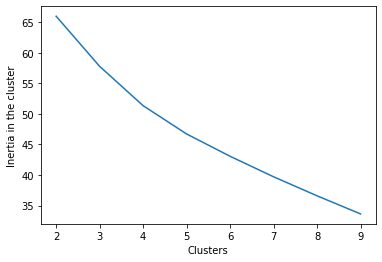

In [208]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(DATA_POS_X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [209]:
KM = KMeans(n_clusters=2)
KM.fit(DATA_POS_X)

CLASSES_POS = []
labels = KM.labels_
for label in labels:
    CLASSES_POS.append(label+1)

len(CLASSES_POS)

450

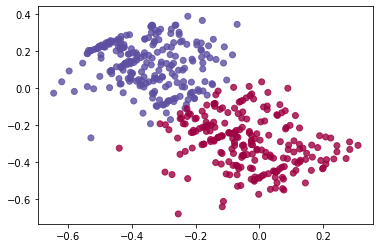

In [210]:
plt.scatter(DATA_POS_X['PC-1'], DATA_POS_X['PC-2'],
            c=CLASSES_POS, cmap="Spectral", alpha=0.8)
plt.show()

### Reconstructing Dataset

In [211]:
DATA_POS['Flood'] = CLASSES_POS

CLASSES = pd.concat([DATA_NEG['Flood'], DATA_POS['Flood']])

DATA_D = DATA_R.copy()
DATA_D['Flood'] = CLASSES

print(DATA_D['Flood'].value_counts())

0    450
2    227
1    223
Name: Flood, dtype: int64


### Dataset Evaluation

In [212]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA_D_NP = DATA_D.to_numpy()
train_x, test_x, train_y, test_y = train_test_split(
    DATA_D_NP[:, :-1], DATA_D_NP[:, -1], test_size=0.3
)

In [213]:
from sklearn import tree

tree_classifier = tree.DecisionTreeClassifier(max_depth=5, random_state=r_seed)
tree_classifier.fit(train_x, train_y)

pred_y = tree_classifier.predict(test_x)

print("ACC:", metrics.accuracy_score(test_y, pred_y))
print("RMSE:", metrics.mean_squared_error(test_y, pred_y))
print("MAE:", metrics.mean_absolute_error(test_y, pred_y))
print("R^2:", metrics.r2_score(test_y, pred_y))
print(metrics.confusion_matrix(test_y, pred_y))

ACC: 0.737037037037037
RMSE: 0.562962962962963
MAE: 0.362962962962963
R^2: 0.1417098879036307
[[99 33 10]
 [ 5 60  3]
 [17  3 40]]


In [214]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gaussian_classifier = GaussianProcessClassifier(1.0 * RBF(1.0))
gaussian_classifier.fit(train_x, train_y)

pred_y = gaussian_classifier.predict(test_x)

print("ACC:", metrics.accuracy_score(test_y, pred_y))
print("RMSE:", metrics.mean_squared_error(test_y, pred_y))
print(metrics.confusion_matrix(test_y, pred_y))

ACC: 0.8111111111111111
RMSE: 0.4
[[102  26  14]
 [  5  63   0]
 [  5   1  54]]


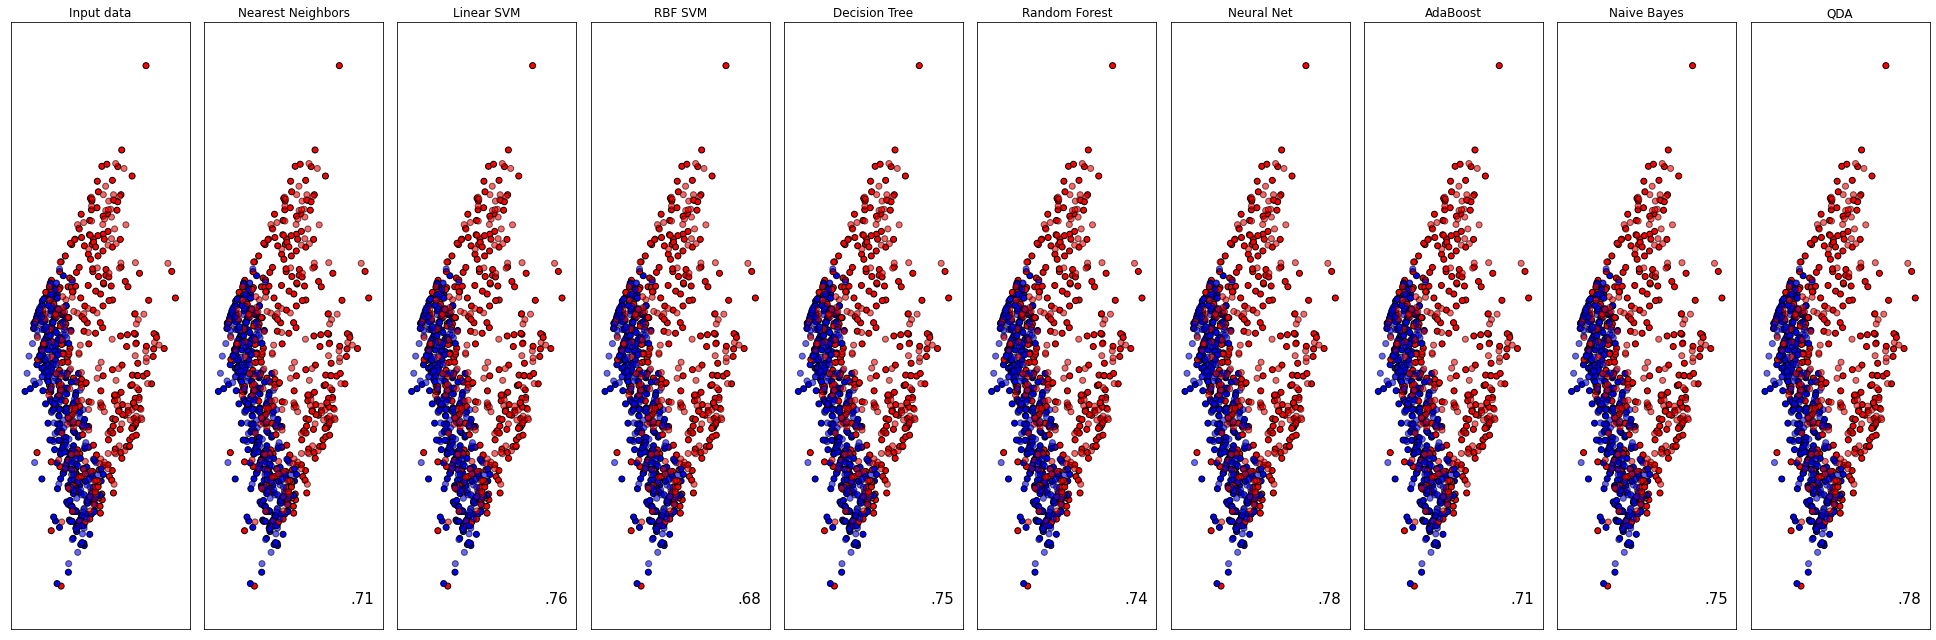

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


# linearly_separable = (X, y)

datasets = [
    (DATA_D_NP[:, :-1], DATA_D_NP[:, -1]),
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
               cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:,
                                   1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()
